In [1]:
import torch
from math import pi,sqrt,log,e
from time import time
from matplotlib import pyplot
import numpy as np
from matplotlib import pyplot as plt
from tqdm.autonotebook import tqdm
dtype = torch.float
device = torch.device("cuda:0")

In [2]:
from src.models.flows.sampling import FactorizedFlowPrior
from src.models.flows.backprop_jacobian_flows.nnflows import NNFlow
from src.models.flows.backprop_jacobian_flows.simple_backprop_flows import SigmoidFlow

In [3]:
prior_mu =  torch.tensor(0.).to(device)
prior_sig =  torch.tensor(1.).to(device)
prior = torch.distributions.normal.Normal(prior_mu,prior_sig)

sampler = FactorizedFlowPrior(d=2,prior_1d=prior)

nnflow = NNFlow(d=2, nh=5, dh=10,batch_norm=True).to(device)
sflow = SigmoidFlow(d=2)

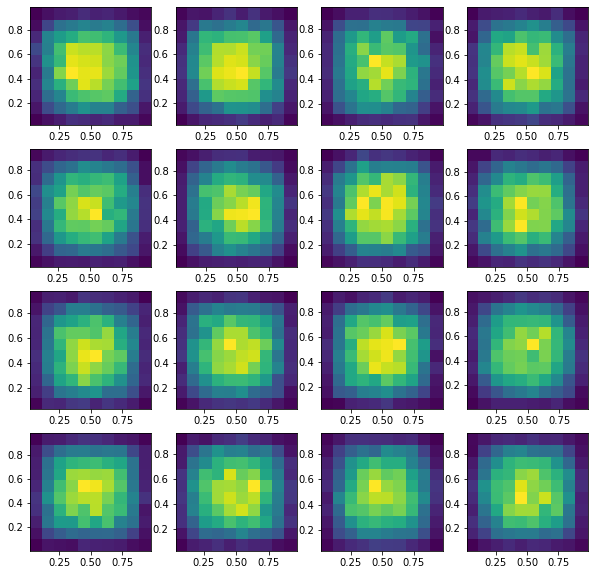

In [4]:
prior_mu =  torch.tensor(0.).to(device)
prior_sig =  torch.tensor(1.).to(device)
prior = torch.distributions.normal.Normal(prior_mu,prior_sig)

sampler = FactorizedFlowPrior(d=2,prior_1d=prior)

sflow = SigmoidFlow(d=2)

mins = []
fig = plt.figure(figsize=(10,10))
for i in range(16):
    nnflow = NNFlow(d=2, nh=5, dh=10,batch_norm=True).to(device)

    z = sampler(10000)
    x = sflow(nnflow(z)*0.+z)
    fig.add_subplot(4,4,i+1)
    hist,_,_,_=plt.hist2d(x[:,0].detach().cpu().numpy(),x[:,1].detach().cpu().numpy())
    
    mins.append(np.min(hist))
plt.show()

In [5]:
print(mins)

[1.0, 1.0, 4.0, 1.0, 0.0, 2.0, 4.0, 2.0, 2.0, 2.0, 4.0, 1.0, 2.0, 3.0, 3.0, 1.0]


In [7]:
prior_mu =  torch.tensor(0.).to(device)
prior_sig =  torch.tensor(1.).to(device)
prior = torch.distributions.normal.Normal(prior_mu,prior_sig)

sampler = FactorizedFlowPrior(d=2,prior_1d=prior)

nnflow = NNFlow(d=2, nh=5, dh=10,batch_norm=False).to(device)
nnflow.weight_init_identity_()
sflow = SigmoidFlow(d=2)

batch_size=10000

z = sampler(batch_size)
x = sflow(nnflow(z))
j = torch.exp(x[:,-1])

var,one = torch.var_mean(j)
print("{}+/-{}".format(one.cpu().item(),torch.sqrt(var/batch_size).cpu().item()))

RuntimeError: The size of tensor a (10) must match the size of tensor b (2) at non-singleton dimension 0

In [ ]:
plt.figure(figsize=(5,5))
plt.hist2d(x[:,0].detach().cpu().numpy(),x[:,1].detach().cpu().numpy())
plt.show()

(array([9.99974e+05, 1.40000e+01, 5.00000e+00, 2.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([   0.     ,  152.79617,  305.59235,  458.3885 ,  611.1847 ,
         763.98083,  916.777  , 1069.5731 , 1222.3694 , 1375.1655 ,
        1527.9617 ], dtype=float32),
 <a list of 10 Patch objects>)

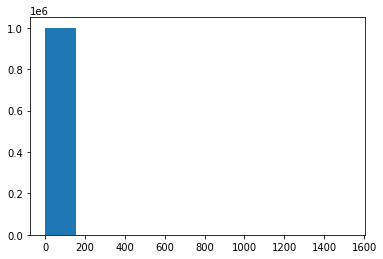

In [98]:
plt.hist((j).detach().cpu())

In [99]:
torch.max(j),torch.argmax(j)

(tensor(1527.9617, device='cuda:0', grad_fn=<MaxBackward1>),
 tensor(486526, device='cuda:0', grad_fn=<NotImplemented>))

In [100]:
x[825898]

tensor([0.5032, 0.1992, 2.1154], device='cuda:0', grad_fn=<SelectBackward>)

In [101]:
np.exp(1.0238e+01)

27945.179639314723

In [102]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

 
x = arange(-10,10.0,0.1).astype(np.float32)
y = arange(-10.0,10.0,0.1).astype(np.float32)
X,Y = meshgrid(x, y) # grid of point
X = torch.tensor(X)
Y=torch.tensor(Y)

In [103]:
XY=torch.cat((X.unsqueeze(-1),Y.unsqueeze(-1)),-1)

In [104]:
J=(-torch.sum(sampler.prior.log_prob(XY),axis=-1))
print(J.shape)
print(XY.shape)

torch.Size([200, 200])
torch.Size([200, 200, 2])


In [119]:
XYJ = torch.stack((X,Y,J),-1).to(device)
out=sflow((XYJ.reshape(200*200,3)+0.*nnflow(XYJ.reshape(200*200,3)))).detach().reshape(200,200,3).cpu()
Z=(out[:,:,-1]).numpy()

In [120]:
extx = torch.min(out[:,:,0]).item(),torch.max(out[:,:,0]).item()
exty = torch.min(out[:,:,1]).item(),torch.max(out[:,:,1]).item()
ext = (*extx,*exty)

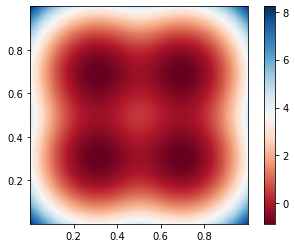

In [121]:
im = imshow(Z,cmap=cm.RdBu,extent=ext) # drawing the function
# adding the Contour lines with labels
#cset = contour(Z,arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
#clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right
# latex fashion title
#title('$z=(1-x^2+y^3) e^{-(x^2+y^2)/2}$')
show()

In [111]:
(nnflow(torch.tensor([[0.,1.,1.],[1.,0.,1.]]).to(device)))

tensor([[ 1.9913e-03,  5.8636e-03, -8.8279e+00],
        [-1.2241e-02,  8.7971e-03, -8.6666e+00]], device='cuda:0',
       grad_fn=<CatBackward>)